# Spooky Author Identification

Objective:

The  dataset contains text from works of fiction written by spooky authors of the public domain:

Edgar Allan Poe (EAP)
HP Lovecraft (HPL)
Mary Wollstonecraft Shelley (MWS)
The objective is to accurately identify the author of the sentences in the test set.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


In [5]:
train = pd.read_csv(r"train\train.csv")
test = pd.read_csv(r"test\test.csv")

In [6]:
train.head()

,id,text,author
0,id00001,Idris was well content with this resolve of mine.,MWS
1,id00002,"I was faint, even fainter than the hateful mod...",HPL
2,id00003,"Above all, I burn to know the incidents of you...",EAP
3,id00004,"He might see, perhaps, one or two points with ...",EAP
4,id00005,All obeyed the Lord Protector of dying England...,MWS


In [7]:
train.apply(lambda x: sum(x.isnull()),axis=0)

id        0
text      0
author    0
dtype: int64

In [8]:
train.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id19211,His good wife waxes stouter and his children o...,EAP
freq,1,1,7900


In [9]:
print('Number of rows and columns in data set',train.shape)


Number of rows and columns in data set (19579, 3)


In [10]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

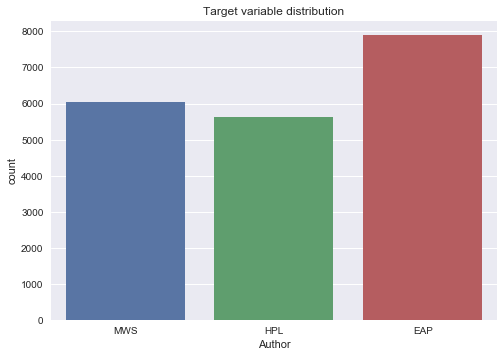

In [11]:
plt.figure()
sns.countplot(train['author'],)
plt.xlabel('Author')
plt.title('Target variable distribution')
plt.show()

In [12]:
train_df = train

# convert author labels into numerical variables
train_df['author_num'] = train_df.author.map({'EAP':0, 'HPL':1, 'MWS':2})


In [13]:

#train_df = train_df.drop("author",axis=1)


In [14]:
train_df.head()

,id,text,author,author_num
0,id00001,Idris was well content with this resolve of mine.,MWS,2
1,id00002,"I was faint, even fainter than the hateful mod...",HPL,1
2,id00003,"Above all, I burn to know the incidents of you...",EAP,0
3,id00004,"He might see, perhaps, one or two points with ...",EAP,0
4,id00005,All obeyed the Lord Protector of dying England...,MWS,2


In [15]:
 = train_df['text']
y = train_df['author_num']


In [16]:
print(X.shape)
print(y.shape)

(19579,)
(19579,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [18]:
# TO check if the authors are evenly distributed
print(y_train.value_counts())
print(y_test.value_counts())

0    6352
2    4815
1    4496
Name: author_num, dtype: int64
0    1548
2    1229
1    1139
Name: author_num, dtype: int64


# CountVectorizer : 


Countvectorizer gives out the sparse matrix which contains the frequency of each word in respective documents/Data.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [20]:
X_train_cv = cv.fit_transform(X_train)

In [21]:
X_train_cv


<15663x22724 sparse matrix of type '<class 'numpy.int64'>'
	with 176254 stored elements in Compressed Sparse Row format>

If you test a countvectorizer with other words than already fitted words than those words will not be taken into consideration
i.e
While we vectorize the testing set we do not fit & transform it because we want to use the same words(tokens) that we use in the training set.
if we fit & tranform it will create the matrix as per the words present in the testing set, hence we will get different set of tokens

In [22]:
X_test_cv = cv.transform(X_test)

In [23]:
X_test_cv

<3916x22724 sparse matrix of type '<class 'numpy.int64'>'
	with 41990 stored elements in Compressed Sparse Row format>

# TF-IDF

Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics. To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies. Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus. This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

https://manjunathhiremathm.wixsite.com/portfolio/blog-1/countvectorizer-v-s-tfidfvector

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [25]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [26]:
X_train_tfidf

<15663x23027 sparse matrix of type '<class 'numpy.float64'>'
	with 343686 stored elements in Compressed Sparse Row format>

In [27]:
X_test_tfidf

<3916x23027 sparse matrix of type '<class 'numpy.float64'>'
	with 83688 stored elements in Compressed Sparse Row format>

# Using Logistic Regression with CountVectorizer to evaluate the author 

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_cv, y_train)
y_test_pred = LR.predict(X_test_cv)



In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))


0.796475995914


Confusion matrix :
A confusion matrix is a matrix where we can see where the predicted values are, and where they should be.

In [30]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_test_pred)
cn

array([[1330,   97,  121],
       [ 190,  856,   93],
       [ 226,   70,  933]])

In [31]:
y_train_pred = LR.predict(X_train_cv)
print(metrics.accuracy_score(y_train, y_train_pred))


0.96501308817


In [32]:
cn = confusion_matrix(y_train, y_train_pred)
cn

array([[6239,   42,   71],
       [ 155, 4312,   29],
       [ 211,   40, 4564]])

 Using Logistic Regression model with the entire dataset from "train.csv"

In [33]:
X_cv = cv.fit_transform(X)

In [34]:
X_cv

<19579x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 220471 stored elements in Compressed Sparse Row format>

In [35]:
LR.fit(X_cv,y)
ytrain_pred = LR.predict(X_cv)
metrics.accuracy_score(y, ytrain_pred)

0.95990602175800599

In [36]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [37]:
test_cv = cv.transform(test['text'])
test_cv

<8392x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 89754 stored elements in Compressed Sparse Row format>

In [38]:
y_pred = LR.predict(test_cv)

In [39]:
y_pred

array([2, 0, 1, ..., 0, 2, 1], dtype=int64)

In [40]:
y_pred_prob = LR.predict_proba(test_cv)
y_pred_prob

array([[  1.93960567e-01,   3.76668417e-02,   7.68372591e-01],
       [  8.96907049e-01,   1.01043540e-01,   2.04941158e-03],
       [  4.65987896e-01,   5.19089147e-01,   1.49229565e-02],
       ..., 
       [  8.77196049e-01,   5.15178609e-02,   7.12860900e-02],
       [  1.53181466e-01,   5.25602785e-03,   8.41562506e-01],
       [  3.11033457e-01,   6.88454376e-01,   5.12167196e-04]])

In [41]:
result_LR_cv = pd.DataFrame(y_pred_prob, columns=['EAP_Prob','HPL_Prob','MWS_Prob'])
result_LR_cv.insert(0, 'id', test['id'])
result_LR_cv.insert(1, 'text', test['text'])
result_LR_cv.insert(2, 'Predicted',y_pred)
result_LR_cv.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.193961,0.037667,0.768373
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.896907,0.101044,0.002049
2,id00134,And when they had broken down the frail door t...,1,0.465988,0.519089,0.014923
3,id27757,While I was thinking how I should possibly man...,0,0.826527,0.167050,0.006423
4,id04081,I am not sure to what limit his knowledge may ...,0,0.852302,0.082401,0.065296


In [42]:
result_LR_cv['Predicted_Author'] = result_LR_cv.Predicted.map({0:'EAP', 1:'HPL', 2:'MWS'})

In [43]:
result_LR_cv.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob,Predicted_Author
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.193961,0.037667,0.768373,MWS
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.896907,0.101044,0.002049,EAP
2,id00134,And when they had broken down the frail door t...,1,0.465988,0.519089,0.014923,HPL
3,id27757,While I was thinking how I should possibly man...,0,0.826527,0.167050,0.006423,EAP
4,id04081,I am not sure to what limit his knowledge may ...,0,0.852302,0.082401,0.065296,EAP


In [44]:
from pandas import ExcelWriter

writer = ExcelWriter('Predicted Author.xlsx' , engine='xlsxwriter')
result_LR_cv.to_excel(writer,sheet_name='LogisticRegression_CountVec',index=False,  columns=['id','text', 'Predicted_Author','EAP_Prob','HPL_Prob',
'MWS_Prob'])


# Using Logistic Regression with Tf-idfVectorizer to evaluate the author


In [45]:
LR = LogisticRegression()
LR.fit(X_train_tfidf, y_train)
y_test_tfidf = LR.predict(X_test_tfidf)

In [46]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_tfidf))

0.808478038815


In [47]:
cn = confusion_matrix(y_test, y_test_tfidf)
cn

array([[1317,  108,  123],
       [ 188,  879,   72],
       [ 196,   63,  970]])

In [48]:
y_train_tfidf = LR.predict(X_train_tfidf)
print(metrics.accuracy_score(y_train, y_train_tfidf))

0.896060780183


In [49]:
cn = confusion_matrix(y_train, y_train_tfidf)
cn

array([[5874,  203,  275],
       [ 412, 3965,  119],
       [ 458,  161, 4196]])

In [50]:
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<19579x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 429602 stored elements in Compressed Sparse Row format>

In [51]:
LR.fit(X_tfidf,y)
y_tfidf = LR.predict(X_tfidf)
metrics.accuracy_score(y, y_tfidf)

0.89463200367740947

In [52]:
cn = confusion_matrix(y, y_tfidf)
cn

array([[7277,  273,  350],
       [ 502, 4970,  163],
       [ 581,  194, 5269]])

In [53]:
test_tfidf = tfidf.transform(test['text'])
test_tfidf

<8392x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 179102 stored elements in Compressed Sparse Row format>

In [54]:
y_tfidf = LR.predict(test_tfidf)
y_tfidf

array([2, 0, 1, ..., 0, 2, 1], dtype=int64)

In [55]:
y_tfidf_prob = LR.predict_proba(test_tfidf)
y_tfidf_prob

array([[ 0.3130204 ,  0.08230496,  0.60467464],
       [ 0.73856701,  0.22417631,  0.03725668],
       [ 0.15833314,  0.74413392,  0.09753295],
       ..., 
       [ 0.71202586,  0.14799617,  0.13997797],
       [ 0.33760937,  0.07294748,  0.58944315],
       [ 0.42534208,  0.54815869,  0.02649923]])

In [56]:
result_tfidf = pd.DataFrame(y_tfidf_prob, columns=['EAP_Prob','HPL_Prob','MWS_Prob'])
result_tfidf.insert(0, 'id', test['id'])
result_tfidf.insert(1, 'text', test['text'])
result_tfidf.insert(2, 'Predicted',y_tfidf)
result_tfidf['Predicted_Author'] = result_tfidf.Predicted.map({0:'EAP', 1:'HPL', 2:'MWS'})
result_tfidf.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob,Predicted_Author
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.313020,0.082305,0.604675,MWS
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.738567,0.224176,0.037257,EAP
2,id00134,And when they had broken down the frail door t...,1,0.158333,0.744134,0.097533,HPL
3,id27757,While I was thinking how I should possibly man...,0,0.596801,0.298593,0.104606,EAP
4,id04081,I am not sure to what limit his knowledge may ...,0,0.550307,0.132234,0.317460,EAP


In [57]:
result_tfidf.to_excel(writer,sheet_name='LogisticRegression_Tfidf',index=False,  columns=['id','text', 'Predicted_Author','EAP_Prob','HPL_Prob',
'MWS_Prob'])


# Using Naive Bayes with CountVecterizer to evaluate the author

In [58]:
from sklearn.naive_bayes import MultinomialNB

NB_cv = MultinomialNB()

NB_cv.fit(X_train_cv, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
y_nb_cv = NB_cv.predict(X_test_cv)
print(metrics.accuracy_score(y_test, y_nb_cv))

0.826864147089


In [60]:
y_nb_cv = NB_cv.predict(X_train_cv)
print(metrics.accuracy_score(y_train, y_nb_cv))

0.913873459746


In [61]:
X_cv = cv.fit_transform(X)
X_cv

<19579x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 220471 stored elements in Compressed Sparse Row format>

In [62]:
NB_cv.fit(X_cv,y)
ytrain_nb_cv = NB_cv.predict(X_cv)
metrics.accuracy_score(y, ytrain_nb_cv)


0.90954594208080086

In [63]:
test_cv = cv.transform(test['text'])
test_cv

<8392x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 89754 stored elements in Compressed Sparse Row format>

In [64]:
y_pred_nb_cv = NB_cv.predict(test_cv)
y_pred_nb_cv

array([2, 0, 1, ..., 0, 2, 1], dtype=int64)

In [65]:
y_pred_prob_nb_cv = NB_cv.predict_proba(test_cv)
y_pred_prob_nb_cv

array([[  4.91839929e-03,   6.40983449e-04,   9.94440617e-01],
       [  9.99982266e-01,   1.61780083e-05,   1.55598619e-06],
       [  1.79221196e-01,   8.20713638e-01,   6.51662936e-05],
       ..., 
       [  9.98966935e-01,   4.08813374e-04,   6.24251183e-04],
       [  6.72288296e-04,   6.55477093e-06,   9.99321157e-01],
       [  4.77459465e-03,   9.95224048e-01,   1.35734239e-06]])

In [66]:
result = pd.DataFrame(y_pred_prob_nb_cv, columns=['EAP_Prob','HPL_Prob','MWS_Prob'])
result.insert(0, 'id', test['id'])
result.insert(1, 'text', test['text'])
result.insert(2, 'Predicted',y_pred_nb_cv)
result.head()


,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.004918,0.000641,0.994441
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.999982,0.000016,0.000002
2,id00134,And when they had broken down the frail door t...,1,0.179221,0.820714,0.000065
3,id27757,While I was thinking how I should possibly man...,1,0.449629,0.550370,0.000001
4,id04081,I am not sure to what limit his knowledge may ...,0,0.970497,0.022190,0.007314


In [67]:
result['Predicted_Author'] = result.Predicted.map({0:'EAP', 1:'HPL', 2:'MWS'})
result.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob,Predicted_Author
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.004918,0.000641,0.994441,MWS
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.999982,0.000016,0.000002,EAP
2,id00134,And when they had broken down the frail door t...,1,0.179221,0.820714,0.000065,HPL
3,id27757,While I was thinking how I should possibly man...,1,0.449629,0.550370,0.000001,HPL
4,id04081,I am not sure to what limit his knowledge may ...,0,0.970497,0.022190,0.007314,EAP


In [68]:
result.to_excel(writer,sheet_name='NavieBayes_CountVec',index=False,  columns=['id','text', 'Predicted_Author','EAP_Prob','HPL_Prob',
'MWS_Prob'])


# Using Naive Bayes with tf-idf to evaluate the author

In [69]:
NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train_tfidf, y_train)
y_test_tfidf = NB_tfidf.predict(X_test_tfidf)

In [70]:
print(metrics.accuracy_score(y_test, y_test_tfidf))

0.811287027579


In [71]:
y_train_NB_TFIDF = NB_tfidf.predict(X_train_tfidf)
print(metrics.accuracy_score(y_train, y_train_NB_TFIDF))

0.900338377067


In [72]:
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<19579x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 429602 stored elements in Compressed Sparse Row format>

In [73]:
NB_tfidf.fit(X_tfidf,y)
ytrain_nb_tfidf = NB_tfidf.predict(X_tfidf)
metrics.accuracy_score(y, ytrain_nb_tfidf)

0.90014811788140359

In [74]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [75]:
test_cv = tfidf.transform(test['text'])
test_cv

<8392x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 179102 stored elements in Compressed Sparse Row format>

In [76]:
y_pred_nb_tfidf = NB_tfidf.predict(test_cv)
y_pred_nb_tfidf

array([2, 0, 1, ..., 0, 2, 1], dtype=int64)

In [77]:
y_pred_prob_nb_tfidf = NB_tfidf.predict_proba(test_cv)
y_pred_prob_nb_tfidf

array([[ 0.28741668,  0.08762216,  0.62496115],
       [ 0.78009262,  0.12890118,  0.09100619],
       [ 0.38907427,  0.51992809,  0.09099764],
       ..., 
       [ 0.78105253,  0.08363748,  0.13530999],
       [ 0.31740973,  0.06731709,  0.61527317],
       [ 0.37031601,  0.54583809,  0.0838459 ]])

In [78]:
result = pd.DataFrame(y_pred_prob_nb_tfidf, columns=['EAP_Prob','HPL_Prob','MWS_Prob'])
result.insert(0, 'id', test['id'])
result.insert(1, 'text', test['text'])
result.insert(2, 'Predicted',y_pred)
result.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.287417,0.087622,0.624961
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.780093,0.128901,0.091006
2,id00134,And when they had broken down the frail door t...,1,0.389074,0.519928,0.090998
3,id27757,While I was thinking how I should possibly man...,0,0.547224,0.382172,0.070604
4,id04081,I am not sure to what limit his knowledge may ...,0,0.723383,0.111233,0.165384


In [79]:
result['Predicted_Author'] = result.Predicted.map({0:'EAP', 1:'HPL', 2:'MWS'})
result.head()

,id,text,Predicted,EAP_Prob,HPL_Prob,MWS_Prob,Predicted_Author
0,id02310,"Still, as I urged our leaving Ireland with suc...",2,0.287417,0.087622,0.624961,MWS
1,id24541,"If a fire wanted fanning, it could readily be ...",0,0.780093,0.128901,0.091006,EAP
2,id00134,And when they had broken down the frail door t...,1,0.389074,0.519928,0.090998,HPL
3,id27757,While I was thinking how I should possibly man...,0,0.547224,0.382172,0.070604,EAP
4,id04081,I am not sure to what limit his knowledge may ...,0,0.723383,0.111233,0.165384,EAP


In [81]:
result.to_excel(writer,sheet_name='NavieBayes_TF-IDF',index=False,  columns=['id','text', 'Predicted_Author','EAP_Prob','HPL_Prob',
'MWS_Prob'])
writer.save()

Futher :
1. Use wordclouds to display the words used by the author

3. Use NLTK 
4. perform  K-Fold Cross Validation

In [82]:
from wordcloud import WordCloud

In [83]:
%matplotlib inline

In [85]:
plt.figure(figsize=(20,10))


In [89]:
wordcloud = WordCloud(background_color='black', mode="RGB",width=2000,height=1000).generate(X[0])

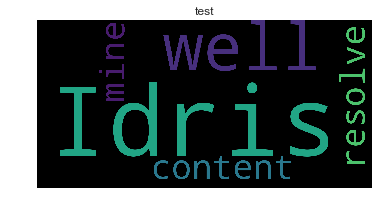

In [91]:
plt.title("test")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [92]:
X[0]

'Idris was well content with this resolve of mine.'